In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics, svm
import openpyxl
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVR

In [34]:
df = pd.read_excel('datasets/Online Retail.xlsx')

In [35]:
df.head()   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
df.shape

(541909, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [38]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [39]:
# Check for missing values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
# Since here CustomerID  has meaningful values, I drop the missing values
# But Description has no meaningful values, so I drop the column
df = df.dropna(subset=['CustomerID'])
df = df.drop(['Description'], axis=1)

In [41]:
# I need create a new columns for Total revenue as target variable
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [42]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df = df.drop(['InvoiceDate'], axis=1)

In [44]:
df.head()   

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month,Day,Hour
0,536365,85123A,6,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,8,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,8


In [45]:
# Let's drop the country column
df = df.drop(['Country'], axis=1)

In [46]:
# let's convert object to numerical
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Optionally, handle NaN values if needed
df = df.dropna(subset=['StockCode', 'CustomerID', 'InvoiceNo'])


<Axes: >

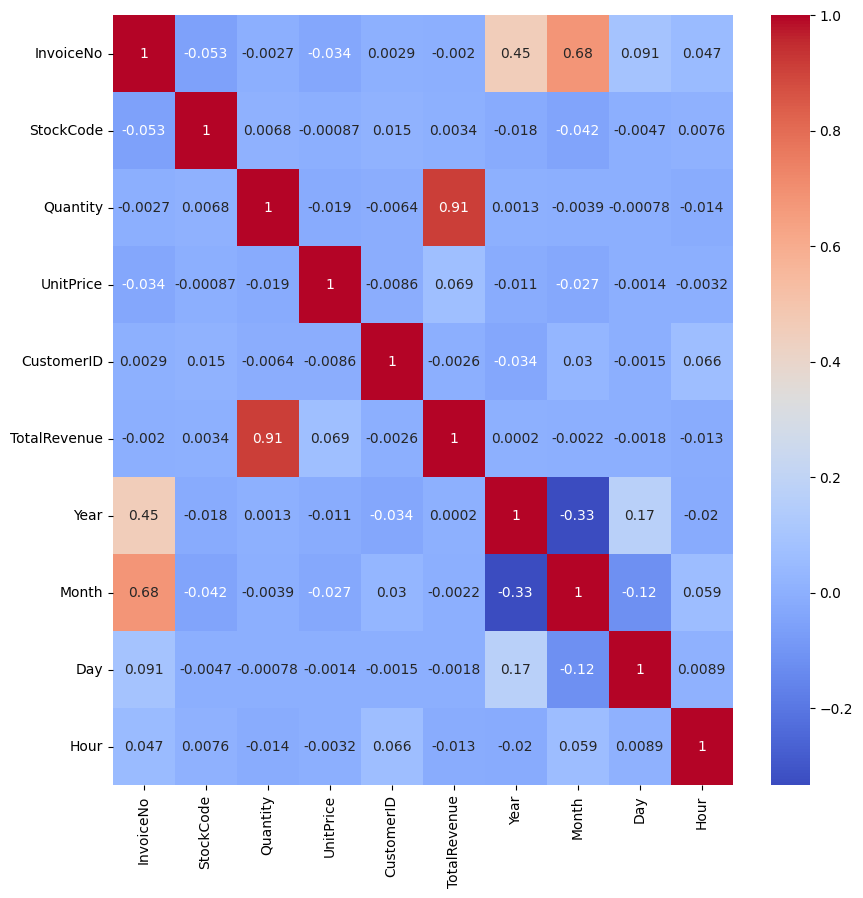

In [47]:
# let's check the correlation between the variables
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [48]:
# TotalRevenue has a high correlation with Quantity, it is not surprising, "ToTalRevenue" = "Quantity" * "UnitPrice"
# InvoiceNo has a high correlation with year and month which means when transactions are done.

In [ ]:
# Since this is a huge dataset, I have to reduce the numbers of rows.
# Using sample to reduce numbers of rows
df = df.sample(n=20000, random_state=42)

In [50]:
# Checking the multicollinearity between the features
X = df.drop('TotalRevenue', axis=1)
y = df['TotalRevenue']

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,InvoiceNo,3700.126986
1,StockCode,3.991463
2,Quantity,1.078198
3,UnitPrice,1.582355
4,CustomerID,81.289474
5,Year,3526.688798
6,Month,12.168971
7,Day,4.318137
8,Hour,32.847088


In [51]:
# let's drop the features with high VIF
df = df.drop(['InvoiceNo'], axis=1)

In [52]:
# let's find the outliers
Q1 = quantile = df.quantile(0.15)
Q3 = quantile = df.quantile(0.85)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
StockCode,4812
Quantity,2331
UnitPrice,1051
CustomerID,0
TotalRevenue,2820
Year,3171
Month,0
Day,0
Hour,0


In [53]:
# let's remove the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
params = {
    'svr__C':       [0.1, 1, 10, 100],
    'svr__epsilon': [0.0, 0.5, 0.8, 0.2],
    'svr__gamma':   [0.5, 0.01, 'scale'],
    'svr__kernel':  ['linear', 'rbf', 'poly']
}


In [75]:
pipeline = make_pipeline(StandardScaler(),SVR())

In [76]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=params,
    n_iter=10,
    cv=3,
    scoring='r2',           
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_jobs=-1,
                   param_distributions={'svr__C': [0.1, 1, 10, 100],
                                        'svr__epsilon': [0.0, 0.5, 0.8, 0.2],
                                        'svr__gamma': [0.5, 0.01, 'scale'],
                                        'svr__kernel': ['linear', 'rbf',
                                                        'poly']},
                   random_state=42, scoring='r2', verbose=2)

In [66]:
print("Best Params:", random_search.best_params_)
print("Best CV Score (R^2):", random_search.best_score_)

Best Params: {'svr__gamma': 0.01, 'svr__epsilon': 0.1, 'svr__C': 100}
Best CV Score (R^2): 0.4044044831515253


In [ ]:
# Since the data is recorded  for the UK market, for total revenue. I add the pound sign to the total revenue

In [79]:
best_model = random_search.best_estimator_

forecast = best_model.predict(X_test)

mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forecast)

print("Mean Absolute Error (MAE): {:.2f} £".format(mae))
print("Mean Squared Error (MSE): {:.2f} £".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f} £".format(rmse))
print("R-squared (R2): {:.2f}".format(r2))

Mean Absolute Error (MAE): 11.06 £
Mean Squared Error (MSE): 3217.35 £
Root Mean Squared Error (RMSE): 56.72 £
R-squared (R2): 0.37


## <span style="color: #20C997;">Personal Analysis</span>
I took this dataset from the UCI Machine Learning  webpage, since I could not find a good dataset for my task, I used this dataset. Originally this dataset is used for classification tasks.<br>
But I added new column for total revenue and used this dataset for regression task. I used SVR for regression task. I used RandomizedSearchCV for hyperparameter tuning.<br>
This dataset is huge and I reduced the number of rows to 20 k. I also handled missing values and outliers. I also checked the multicollinearity between the features. I also checked the correlation between the features.<br> The MAE is only 11.06 which means on average my model predicts this unit from actual Total revenue. The RMSE is also high and model can explain only 37%.<br>SVR model is too slowly according others models.


